#  <h1><center>Social Media Content And Beverages 🥤</center></h1>
<h2><center> Analysis Of Top Public Posts In Social Media Channels At Singapore Around Juices And Beverages <center></h2>

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/beverage.png?raw=true" width = '1200' height = '400' class="center" >

# **⬛ Introduction**

##◼ **There is an enormous amount of data** being created on the internet every second — posts, comments, photos, and videos. These are types of data. But in this case, we are going to focus on Text, specifically about juices and beverages in social media channels in Singapore.

##◼ All social media contents are based on written words — tweets, Facebook posts, comments, online reviews, and so on. Being a social media marketer, a Facebook group/profile moderator, or trying to promote your business on social media requires you to know how your audience reacts to the content you are uploading. One way is to read it all, what people feel towards juices and beverages, divide them into similar topic groups, calculate statistics.

# **⬛ What Makes Social Media Content So Unique?**

##◼ Before jumping to the analyses, it is really important to understand why social media texts are so unique:

## ✔️ **Posts and comments are short**. They mostly contain one simple sentence or even single word or expression. This gives us a limited amount of information to obtain just from one post.

## ✔️ **Emojis and smiley faces** — used almost exclusively on social media. They give additional details about the author’s emotions and context.

## ✔️ **Slang phrases** which make posts resemble spoken language rather than written. It makes statements appear more casual.

##◼ **These features make social media a whole different source of information and demand special attention while running an analysis using machine learning**. In contrast, most open-source machine learning solutions are based on long, formal text, like Wikipedia articles and other website posts. As a result, these models perform badly on social media data, because they don’t understand additional forms of expression included.

# **⬛ Topic Modeling For Social Media Content**

##◼ Machine learning for text analysis is a vast field with lots of different model types that can gain insight into the data. But in this case, **Topic Modeling** will be more suitable in this analysis

##◼ It can find topics which are patterns hidden within the data on its own without supervision and help — which makes it an unsupervised machine learning method. This means that it is easy to build a model for each individual problem.

<img src="https://github.com/ijoseff/Social-Media-Content-Beverages-Analysis/blob/master/lda.png?raw=true" width = '1200' height = '400' class="center" >

##◼ There are lots of different algorithms that can be used for this task, but the most common and widely used is LDA (Latent Dirichlet Allocation). It’s based on word frequencies and topics distribution in texts. To put it simply, this method counts words in a given data set and groups them based on their co-occurrence into topics. Then the percentage distribution of topics in each document is calculated.

##◼ As a result this method assumes that each text is a mixture of topics which works great with long documents where every paragraph relates to a different matter.

---

# **⬛ Introduction To The Dataset**

##🔔 **Importing Modules**

In [3]:
# Importing modules
import pandas as pd
import os
os.chdir('..')

import numpy as np
import re, nltk, spacy, gensim

import logging
import warnings
warnings.filterwarnings('ignore')  

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [4]:
# Store dataset in a Pandas Dataframe
df = pd.read_csv('/content/social.csv')

##🔔 **Check dataset**
## Show the Title and Content

In [5]:
# Show the Title and Content column
df[['Title', 'Content']]

,Title,Content
0,@debbstarr @heysayfey We didn’t juice the thug...,@debbstarr @heysayfey We didn’t juice the thug...
1,FRUIT JUICES by @nutricallyfit . Are fruit jui...,FRUIT JUICES by @nutricallyfit . Are fruit jui...
2,are all the juices taste the same?,reds79 wrote: juices are sweet that not the ri...
3,are all the juices taste the same?,reds79 wrote: juices are sweet that not the ...
4,These places are JUICE perfect! HIC JUICE A J...,These places are JUICE perfect! HIC JUICE A J...
...,...,...
8067,"China: slowing economy and inequality, Ah Tion...",https://www.straitstimes.com/business/pr...-th...
8068,"China: slowing economy and inequality, Ah Tion...",https://www.straitstimes.com/business/pr...-th...
8069,"China: slowing economy and inequality, Ah Tion...",https://www.straitstimes.com/business/pr...-th...
8070,"China: slowing economy and inequality, Ah Tion...",https://www.straitstimes.com/business/pr...-th...


##🔔 We can observed that we **have 13 features and 8,072 rows of data** but in this task we're just going to focus in getting juicy insights in social media's title and content column. And breakdown the data to make it more understandable to analysts so that they can decipher what are people saying around Juices & Beverages. 🍹

In [6]:
# Check data dimension
df.shape

(8072, 13)

# **⬛ Data Cleaning And Preparation**

##🔔 Models will be built on the column 'Content'. Other columns could be used for exploratory analysis. Luckily, there's no missing data in title and content column.

In [7]:
# Check for missing values
df.isnull().mean()

Post ID              0.000000
Post Date            0.000000
Title                0.000000
Content              0.000000
Post Type            0.000000
URL                  0.000000
Channel Name         0.000000
Channel Country      0.000000
Channel Site Type    0.000000
Channel Language     0.000000
Channel URL          0.000000
Voice Name           0.018211
Voice URL            0.018211
dtype: float64

##🔔 In this part, we are going to **clean and remove unnecessary characters** that offers no value in generating insights and in order to process these data as well into the machine learning model.


## 1️⃣ **Remove the punctuations**.

## 2️⃣ **Convert the contents to lowercase**.

## ❌ Punctuations = '[,@#\.!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~!?]',


In [8]:
# Import regular expression library
import re

# Remove punctuation
df['Content'] = df['Content'].map(lambda x: re.sub('[,@#\.!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~!?]','', x))

# Convert the contents to lowercase
df['Content'] = df['Content'].map(lambda x: x.lower())

# Print out the first rows of papers
df['Content'].head()

0    debbstarr heysayfey we didn’t juice the thug l...
1    fruit juices by nutricallyfit  are fruit juice...
2    reds79 wrote juices are sweet that not the rig...
3    reds79 wrote  juices are sweet  that not the r...
4    these places are juice perfect  hic juice a ju...
Name: Content, dtype: object

# **⬛ Exploratory Analysis With WordCloud**

##🔔 This allows us to comprehend the topic and name it. It is a quick and easy solution that can replace reading the whole set of text and spare us hours of tedious work of dividing it into sets.

##☁️ **WorldCloud for Title**

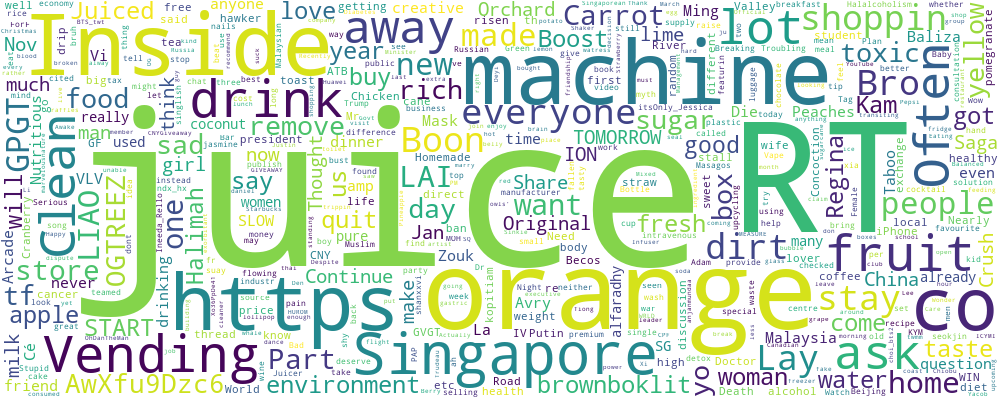

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different titles together.
long_string = ','.join(list(df['Title'].values))

# Generate the word cloud
wordcloud = WordCloud(background_color = 'white',
                      max_words = 500,
                      contour_width = 3,
                      contour_color = 'steelblue',
                      collocations = False, width=1000, height=400).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

##🔔 You can see in the picture above the Title word cloud. The most dominant words are **juice, orange, carrot, people, singapore, fresh, taste, share environment, inside, drink, fruits, vending, machine, clean, stay, away, shopping, Lot, everyone, etc**

##🔔 So it’s probably a topic about **Food and Places**. 🍔🥤

<img src="https://github.com/ijoseff/Social-Media-Content-Beverages-Analysis/blob/master/drinks.png?raw=true" width = '1200' height = '400' class="center" >

##🔔 We can tell us a story that "**People** in **Singapore** likes **Clean** and **Fresh** **Fruit** **Juice**s with a flavor of **Orange** and **Carrot** combination (probably taste good!) while **Staying** **Inside** in a **Shared** **Enviroment** with **Everyone** even if they're far **Away** from their **Lot**! or they can just grab a **Drink** in **Vending** **Machine** instead." Ha! 😎

##☁️ **WorldCloud For Content**

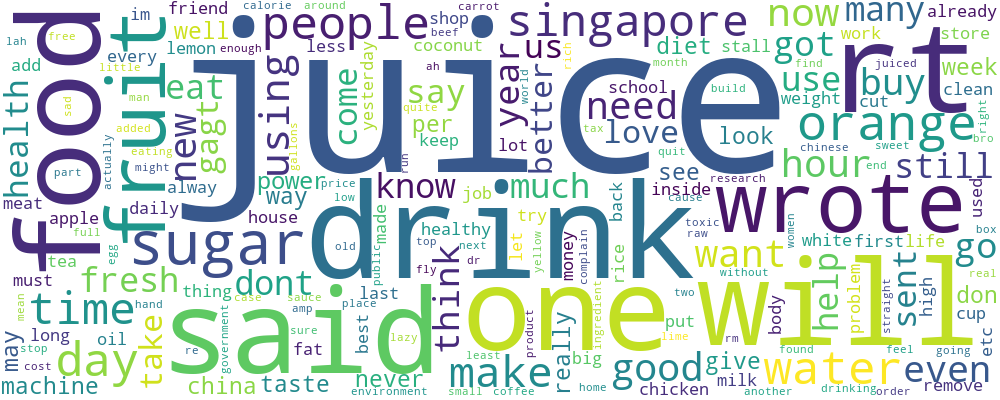

In [10]:
# Join the different processed Content together.
long_string = ','.join(list(df['Content'].values))

# Generate the word cloud
wordcloud2 = WordCloud(background_color = 'white',
                      max_words = 200,
                      contour_width = 3,
                      contour_color = 'steelblue',
                      collocations = False, width=1000, height=400).generate(long_string)

# Visualize the word cloud
wordcloud2.to_image()

##🔔 For the Content Word cloud, it can be observed that the dominant words are somehow similar to the title word cloud. The topic is pretty much about food and drinks as well. Possible story with this is that **"People likes to eat fresh and healthy food that has less content of sugar because they're thinking about their health?"** 😃

# **⬛ Prepare Data For Topic Modelling**

#◼ **Step 1: Split Sentences to Words**

##🔔 This is also called Tokenization. It breaks the raw text into words. These tokens help in understanding the context or developing the model for the NLP. 

In [11]:
# Set timer in processing
%%time

# Import libraries
import gensim
from gensim.utils import simple_preprocess

# Split sentences into words
def sent_to_words (sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))
data = df.Content.values.tolist()
data_words = list(sent_to_words(data))

# Check the data
print(data_words[:1])

[['debbstarr', 'heysayfey', 'we', 'didn', 'juice', 'the', 'thug', 'life', 'the', 'thug', 'life', 'juiced', 'us']]
CPU times: user 1.11 s, sys: 14.4 ms, total: 1.12 s
Wall time: 1.15 s


#◼ **Step 2: Build N-grams**

##🔔 N-gram means a sequence of N words. So for example, “Social Media” is a 2-gram (a bigram), “A Social Media Post” is a 4-gram, and “Write a Content” is a 3-gram (trigram).

In [12]:
# Build the bigram and trigram models # higher threshold fewer phrases.
bigram = gensim.models.Phrases(data_words, min_count = 5, threshold = 100)
trigram = gensim.models.Phrases(bigram[data_words], threshold = 100)

# Faster way to get a sentence formatted as a bigram or trigram
bigram_mod = gensim.models.phrases.Phraser (bigram)
trigram_mod = gensim.models.phrases.Phraser (trigram)

#◼ **Step 3: Remove Stopwords**

##🔔 Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

In [13]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['data', 'development', 'result', 'analysis', 'model'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Lemmatization function
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
      doc = nlp(" ".join(sent))
      texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#◼ **Step 4: Lemmatize**

##🔔 Lemmatization algorithm would know that the word 'better' is derived from the word 'good', and hence, the lemme is good.

In [14]:
# Import spacy library
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

# Lemmatize keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

# Check data
print(data_lemmatized[:1])

[['juice']]


#◼ **Step 5: Build Corpora**

##🔔 This just refers to a collection of texts.

In [15]:
# Import library
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View data
print(corpus[:2])

[[(0, 1)], [(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


# **⬛ Build Topic Model**

<img src="https://github.com/ijoseff/Social-Media-Content-Beverages-Analysis/blob/master/lda2.jpg?raw=true" width = '1200' height = '400' class="center" >

##🔔 Statistical model for discovering the abstract "topics" that occur in a collection of documents. This will help us in **text-mining to extract hidden semantic structures** in a corpus. In order to find the **optimal number of topics**. We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. 

##🔔 Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. If we see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

In [16]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                            id2word = id2word,
                                            num_topics = 5,
                                            random_state = 123, # For reproducibility
                                            chunksize = 100,
                                            passes = 10,
                                            alpha = 0.01,
                                            eta = 'auto',
                                            iterations = 400,
                                            per_word_topics = True)


<img src="https://github.com/ijoseff/Social-Media-Content-Beverages-Analysis/blob/master/analyst.png?raw=true" width = '1200' height = '400' class="center" >

##🔔 **We can now observed keywords in the five topics at the output below.**

##🔔 This somehow gave us an idea about what could be a good label for each topics. LDA is an unsupervised learning so it is really up to human knowledge to determine what would be a suitable label for each topic.

##💭 **Topic 0** contains keywords such as **'power', 'big' and 'add'**. Is this about **Measurement**?

##💭 **Topic 1** contains keywords such as **'juice', 'eat' and 'drink'**. Is this about **Food & Drinks**?

##💭 **Topic 2** contains keywords such as **'say', 'think' and 'help'**. Is this about **Expression**?

##💭 **Topic 3** contains keywords such as **'health', 'calorie', 'fat'**. Is this about **Health**?

##💭 **Topic 4** contains keywords such as **'influencer', 'work' and 'daily'**. Is this about **Influence**?

##🔔 Don't worry, this will be further visualize later on 👍

In [17]:
# Import library
from pprint import pprint

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())

# Transform corpus
doc_lda = lda_model[corpus]

[(0,
  '0.017*"see" + 0.017*"much" + 0.015*"power" + 0.013*"new" + 0.011*"big" + '
  '0.009*"month" + 0.009*"first" + 0.009*"add" + 0.008*"use" + 0.007*"order"'),
 (1,
  '0.050*"food" + 0.027*"sugar" + 0.023*"juice" + 0.022*"eat" + 0.019*"drink" '
  '+ 0.019*"would" + 0.018*"still" + 0.016*"say" + 0.015*"come" + 0.014*"go"'),
 (2,
  '0.037*"people" + 0.025*"juice" + 0.020*"say" + 0.020*"help" + 0.017*"drink" '
  '+ 0.017*"fruit" + 0.015*"may" + 0.015*"think" + 0.014*"job" + '
  '0.014*"remove"'),
 (3,
  '0.013*"many" + 0.013*"need" + 0.012*"year" + 0.009*"keep" + 0.008*"say" + '
  '0.008*"fat" + 0.007*"health" + 0.007*"calorie" + 0.007*"include" + '
  '0.006*"back"'),
 (4,
  '0.015*"want" + 0.012*"fly" + 0.009*"good" + 0.009*"start" + '
  '0.009*"influencer" + 0.007*"make" + 0.007*"juice" + 0.007*"take" + '
  '0.007*"work" + 0.006*"daily"')]


# **⬛ Evaluation of Topic Model**

##🔔 **LDA is an unsupervised technique, meaning that we don’t know prior to running the model how many topics exits in our corpus**. We can use LDA visualization tool pyLDAvis, tried a few numbers of topics and compared the results.

##🔔 **Topic coherence is one of the main techniques used to estimate the number of topics** and also a good way to compare difference topic models based on their human-interpretability.

##🔔 We will use both **UMass and c_v measure to see the coherence score of our LDA model** because it capture the optimal number of topics by giving the interpretability of these topics a number called coherence score.

#⬛ **Coherence Score**

##✔ **Perplexity** = a measure of how good the model is. Lower value is preferred.

##✔ **C_v**  = Measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

##✔ **umass** = Based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure

In [18]:
# Import library
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus) )

# Compute Coherence Score
coherence_model_lda = CoherenceModel (model = lda_model, texts = data_lemmatized, dictionary = id2word, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: c_v ', coherence_lda)

# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel (model = lda_model, texts = data_lemmatized, dictionary = id2word, coherence = 'u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score u_mass: ', coherence_lda)


Perplexity:  -8.633443318077749

Coherence Score: c_v  0.30420977132819754

Coherence Score u_mass:  -2.998528460683734


# **⬛ Visualize Model**
##🔔 Topic Visualization is also a good way to assess topic models.

In [ ]:
# Intall Library
!pip install -U pyLDAvis

# Import library
import pyLDAvis.gensim

In [20]:
# Visualize the topics
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Show this in notebook
pyLDAvis.enable_notebook()

# Show visualization
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.151494  0.101442       1        1  21.665951
3     -0.049583 -0.265222       2        1  20.717070
4     -0.054376 -0.135531       3        1  20.397606
2      0.224802  0.091775       4        1  18.919283
0     -0.272337  0.207535       5        1  18.300087, topic_info=       Term         Freq        Total Category  logprob  loglift
184    food  1884.000000  1884.000000  Default  30.0000  30.0000
87   people  1239.000000  1239.000000  Default  29.0000  29.0000
232   sugar  1007.000000  1007.000000  Default  28.0000  28.0000
263     eat   835.000000   835.000000  Default  27.0000  27.0000
80    drink  1297.000000  1297.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
29     make   208.441635  1181.022217   Topic5  -5.0340  -0.0362
94     time   193.125259   907.810486   Topic5  -5.1103   0.1506
150   water   166.154816   542.128540   Topic5  -5.2607   0.5157
74       go   166.949661  1114.006348   Topic5  -5.2559  -0.1998
0     juice   156.862640  2258.202881   Topic5  -5.3182  -0.9687

[249 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2366      1  1.002231   account
412       3  0.997172  actually
53        1  0.360142       add
53        2  0.107119       add
53        3  0.011081       add
...     ...       ...       ...
35        1  0.022581      year
35        2  0.698403      year
35        3  0.206456      year
35        4  0.032259      year
35        5  0.040323      year

[340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])

# **⬛ Interpretation**

##◼ Latent topics can then be found by searching for groups of words that frequently occur together in documents across the corpus Documents with similar topics use similar group of words.

##◼ The distance between each topic bubble represent how semantic different they are. The farther they are, the better because it leads to a unique topic. A good model has to have distinct topics. It means no overlapping in bubbles.

##◼ Finally, Everyone can create insights about in a particular aspect but - is that insight near in solving the actual problem? This is actually depends more on domain knowledge of an expert to fully analyze a particular field to determine the underlying concepts of each topic bubble.

# **⬛ Observation**

##⚫ Topic 1 - Food
## This topic contains keywords such as food, sugar, juice, eat and drink.

##⚫ Topic 2 - Health
## This topic contains keywords such fat, health, calorie, body and vegetables.

##⚫ Topic 3 - Influence
## This topic contains keywords such influencers, chinese, industry, change and learn.

##⚫ Topic 4 - Negative Sentiment
## This topic contains keywords such remove, complain, toxic_enviroment, quit and problem.

##⚫ Topic 5 - Location
## This topic contains keywords such market, apartment, move, leave and big.

# **⬛ Conclusion**

##🔴 It can be observed the Food and Negative sentiment topic bubble overlapped in large size. It can be concluded that there is a huge negative feedbacks toward to food.

##🔴 It can also observed that Health and Influence topic bubble overlapped a little bit. It means these two topics are somehow relatable to each other.

##🔴 Topic 5 which is the Location Topic bubble are very far from the other topic bubbles. Location are greatly irrelevant to Food, Health, Influence and Negative sentiment.


---

# **⬛Topic Probabilities Distribution**

# 🔔 Let's check the probabilities of every social media content belonging to a certain topic class.


In [21]:
# Store content column
tc = df[['Content']]

# Get the probabilities being part of a certain topic
all_topics = lda_model.get_document_topics(doc_lda, minimum_probability = 0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

# Content and topic probalities
result = pd.concat([tc, all_topics_df], axis = 1, sort = False)

# Check data columns
result.columns

Index(['Content', 0, 1, 2, 3, 4], dtype='object')

In [22]:
# Rename columns
result.columns = ['Content', 'Food', 'Health', 'Influence', 'Negative Sentiment', 'Location']

# Check data
result.head(10)

,Content,Food,Health,Influence,Negative Sentiment,Location
0,debbstarr heysayfey we didn’t juice the thug l...,0.009524,0.009524,0.009524,0.961905,0.009524
1,fruit juices by nutricallyfit are fruit juice...,0.009524,0.009524,0.136939,0.834489,0.009524
2,reds79 wrote juices are sweet that not the rig...,0.009524,0.009524,0.362429,0.608999,0.009524
3,reds79 wrote juices are sweet that not the r...,0.009524,0.009524,0.362617,0.608811,0.009524
4,these places are juice perfect hic juice a ju...,0.009524,0.009524,0.009524,0.961905,0.009524
5,sumit nanda founder of ega juice clinic tells ...,0.009524,0.009524,0.961905,0.009524,0.009524
6,rt peachyblackg0rl 12 year old me mixing a bun...,0.009524,0.009524,0.961905,0.009524,0.009524
7,get your daily dose of brain juice to keep the...,0.009524,0.009524,0.961905,0.009524,0.009524
8,wakey wakey with refreshing juices and fruitil...,0.009524,0.009524,0.961905,0.009524,0.009524
9,just go to get juiced,0.009524,0.009524,0.961905,0.009524,0.009524


#**⬛ Dominant Topic In Each Social Media Content**

#🔔 Let's determine what topic is given every document. To find that, we find the topic number that has the highest percentage contribution in that document.

In [23]:
# Function below nicely aggregates this information in a presentable table.
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):

    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9619,"people, juice, say, help, drink, fruit, may, t...",debbstarr heysayfey we didn’t juice the thug l...
1,1,2.0,0.8650,"people, juice, say, help, drink, fruit, may, t...",fruit juices by nutricallyfit are fruit juice...
2,2,2.0,0.6313,"people, juice, say, help, drink, fruit, may, t...",reds79 wrote juices are sweet that not the rig...
3,3,2.0,0.6313,"people, juice, say, help, drink, fruit, may, t...",reds79 wrote juices are sweet that not the r...
4,4,2.0,0.9921,"people, juice, say, help, drink, fruit, may, t...",these places are juice perfect hic juice a ju...
5,5,3.0,0.5592,"many, need, year, keep, say, fat, health, calo...",sumit nanda founder of ega juice clinic tells ...
6,6,0.0,0.8351,"see, much, power, new, big, month, first, add,...",rt peachyblackg0rl 12 year old me mixing a bun...
7,7,4.0,0.6286,"want, fly, good, start, influencer, make, juic...",get your daily dose of brain juice to keep the...
8,8,4.0,0.7230,"want, fly, good, start, influencer, make, juic...",wakey wakey with refreshing juices and fruitil...
9,9,1.0,0.9619,"food, sugar, juice, eat, drink, would, still, ...",just go to get juiced


#⬛ More Topic Data Visualization
# 🔔 Let's continue getting more insights through data visualization.

<img src="https://github.com/ijoseff/Social-Media-Content-Beverages-Analysis/blob/master/fit.png?raw=true" width = '1200' height = '400' class="center" >

#◼ Topic Correlations

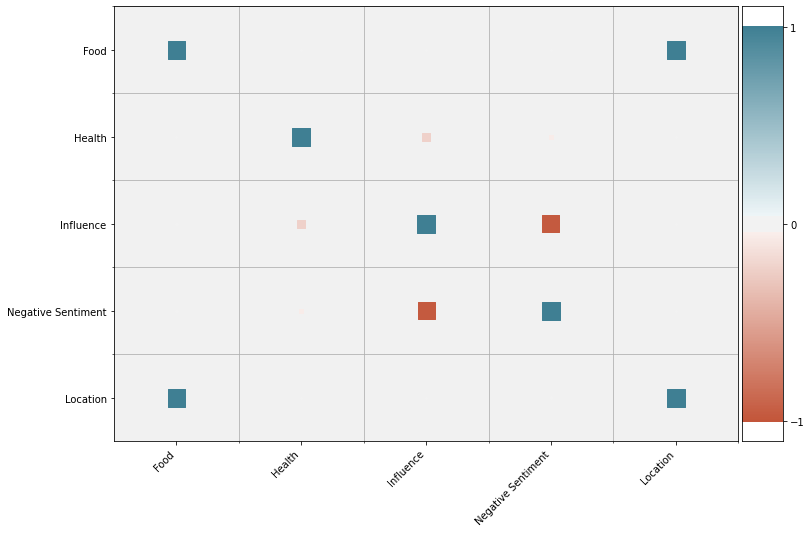

In [25]:
# Install library
!pip install heatmapz

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show correlation in the features by using heatmap
from heatmap import corrplot
plt.figure(figsize=(12, 8))
corrplot(result.corr(), size_scale=300)

#🔔 For some reason, the Influence Topic and Negative Sentiment Topic has a quite high negative correlation to each other in terms of their probabilities of being part in a certain topic class. While Influence Topic and Health Topic still shows a little correlation with each other and others with no correlation at all. We shoud also remember that correlation doesn't mean causation.

#◼ Topic Frequency

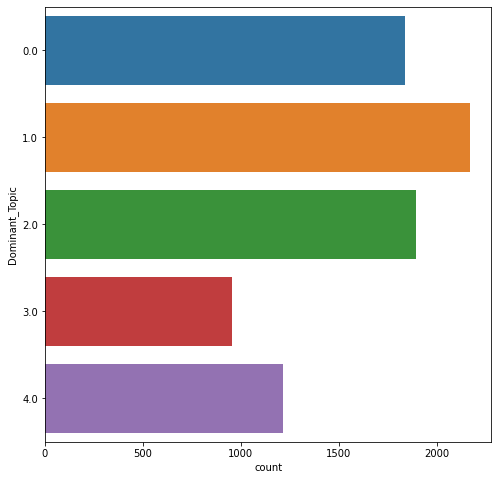

In [26]:
# Plot the number of Topic in dataset
plt.figure(figsize = (8, 8))
sns.countplot(y = "Dominant_Topic", data = df_dominant_topic)
plt.show()

#🔔 We can observe the numbers of each topic class. A lot of people are really interested in Food Topic followed by Health Topic and then Influence Topic. This is a very valuable insights for the marketing team or business professionals - that it is highly recommended to focus their marketing campaign that relates to people's interest. In this case, Food and Fitness.

#🔔 It can also be observed that most of the people active in social media are conscious about their diet, and most probably it is because of the Influencers that are fit, they're setting a standard of fitness through social media that could inspired other people to stay fit as well.


---

#⬛ Gather More Insights in Data
# Let's torture the data to confess more insights 😈 

#◼ Top Influential Channels

In [172]:
# Channel column
channel_name = df['Channel Name']

# Get the channel value counts
unique, counts = np.unique(channel_name, return_counts = True)

# Channel counts
channel_counts = dict(zip(unique, counts))

# Transform into dataframe
channel_freq = pd.DataFrame(list(channel_counts.items()),columns = ['Channel_Name','Channel_Count']) 

# Sort dataframe according to frequency
channel_freq = channel_freq.sort_values(by=['Channel_Count'], ascending = False )

# Add Post Type according to their respective indices
channel_freq['Post_type'] = df['Post Type']

# Add channel Type according to their respective indices
channel_freq['Channel_Type'] = df['Channel Site Type']

# Re-arrange columns
channel_freq = channel_freq[['Channel_Count', 'Channel_Name', 'Channel_Type', 'Post_type']]

# Check top infulential channels
channel_freq.head(10)

,Channel_Count,Channel_Name,Channel_Type,Post_type
317,2528,Twitter - Singapore,MICROBLOG,COMMENT
90,2105,HardwareZone Forum - Eat-Drink-Man-Woman,MICROBLOG,COMMENT
224,1090,SG Talk - Market Talk,MICROBLOG,COMMENT
9,392,All Singapore Stuff Facebook Page,MICROBLOG,COMMENT
44,212,Channel News Asia Singapore Facebook Page,FORUM,COMMENT
304,158,The Straits Times Facebook Page,MICROBLOG,COMMENT
213,108,Reddit Singapore,MICROBLOG,COMMENT
158,105,Money Digest Facebook Page,MICROBLOG,COMMENT
215,79,Reddit Singapore Forum - New,FORUM,COMMENT
159,72,Mothership.sg Facebook Page,MICROBLOG,COMMENT


#🔔 We can see here that Twitter channel has the highest influence in social media followed by HardwareZone Forum channel and then SG Talk channel. Comparing these top 3 channels to other channels, there's a huge gap in terms of numbers of content created by the users. We can also see that Microblogs has the highest frequency in channel type, while Comments as type of post. 

---

#⬛ Supervised Deep Learning Model Implementation

#🔔 From unspervised to supervised learning. After we did some feature engineering in the data to get valuable insights, we were also able to obtained labaled features which are the various topic in each content. We could now also create a model that attempts to predict the topic of every social media content.

#◼ Content & Topic Dataset

#🔔 The Content would be our independent variable and the Dominant Topic would be the dependent variable or the labaled target.

In [232]:
# Dataframe containing content and topic
DF = df_dominant_topic[['Text', 'Dominant_Topic']]

# Check dataframe
DF.head()

,Text,Dominant_Topic
0,debbstarr heysayfey we didn’t juice the thug l...,2.0
1,fruit juices by nutricallyfit are fruit juice...,2.0
2,reds79 wrote juices are sweet that not the rig...,2.0
3,reds79 wrote juices are sweet that not the r...,2.0
4,these places are juice perfect hic juice a ju...,2.0


#◼ Data Preprocessing

In [233]:
# Download stopwords
nltk.download("stopwords")

# Obtain additional stopwords from nltk
from nltk.corpus import stopwords

# Stop words for english
stop_words = stopwords.words('english')

# Add stop words
stop_words.extend(['http', 'www', 'com'])

# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [237]:
# Apply the function to the dataframe
DF['Clean'] = DF['Text'].apply(preprocess)

# Check data
DF.head()

,Text,Dominant_Topic,clean,Clean
0,debbstarr heysayfey we didn’t juice the thug l...,2.0,"[debbstarr, heysayfey, juice, thug, life, thug...","[debbstarr, heysayfey, juice, thug, life, thug..."
1,fruit juices by nutricallyfit are fruit juice...,2.0,"[fruit, juices, nutricallyfit, fruit, juices, ...","[fruit, juices, nutricallyfit, fruit, juices, ..."
2,reds79 wrote juices are sweet that not the rig...,2.0,"[reds, wrote, juices, sweet, right, type, juic...","[reds, wrote, juices, sweet, right, type, juic..."
3,reds79 wrote juices are sweet that not the r...,2.0,"[reds, wrote, juices, sweet, right, type, juic...","[reds, wrote, juices, sweet, right, type, juic..."
4,these places are juice perfect hic juice a ju...,2.0,"[places, juice, perfect, juice, juicery, juice...","[places, juice, perfect, juice, juicery, juice..."


In [242]:
# Obtain the total words present in the dataset
list_of_words = []
for i in DF.Clean:
    for j in i:
        list_of_words.append(j)

In [243]:
# Check data
list_of_words[:10]

['debbstarr',
 'heysayfey',
 'juice',
 'thug',
 'life',
 'thug',
 'life',
 'juiced',
 'fruit',
 'juices']

In [244]:
# Check data length
len(list_of_words)

223436

In [245]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))

# Check data
total_words

24646

In [246]:
# Join the words into a string
DF['Clean_Joined'] = DF['Clean'].apply(lambda x: " ".join(x))

# Check data
DF.head()

,Text,Dominant_Topic,Clean,Clean_Joined
0,debbstarr heysayfey we didn’t juice the thug l...,2.0,"[debbstarr, heysayfey, juice, thug, life, thug...",debbstarr heysayfey juice thug life thug life ...
1,fruit juices by nutricallyfit are fruit juice...,2.0,"[fruit, juices, nutricallyfit, fruit, juices, ...",fruit juices nutricallyfit fruit juices health...
2,reds79 wrote juices are sweet that not the rig...,2.0,"[reds, wrote, juices, sweet, right, type, juic...",reds wrote juices sweet right type juice meant
3,reds79 wrote juices are sweet that not the r...,2.0,"[reds, wrote, juices, sweet, right, type, juic...",reds wrote juices sweet right type juice meant
4,these places are juice perfect hic juice a ju...,2.0,"[places, juice, perfect, juice, juicery, juice...",places juice perfect juice juicery juice clini...


In [249]:
# Import library
import nltk
nltk.download('punkt')

# length of maximum content will be needed to create word embeddings 
maxlen = -1
for doc in DF.Clean_Joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
The maximum number of words in any document is = 2401


#◼ Distribution of No. Words in a Content

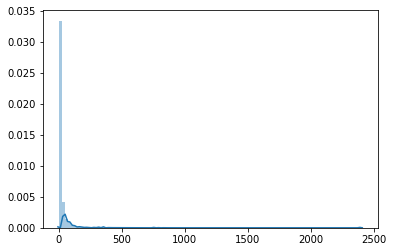

In [331]:
# Visualize the distribution of number of words in a Content
sns.distplot([len(nltk.word_tokenize(x)) for x in DF.Clean_Joined], bins = 100 )
plt.show()

#◼ Data Splitting & Tokenization

In [280]:
# Import library
from sklearn.model_selection import train_test_split

# Split data into test and train 
x_train, x_test, y_train, y_test = train_test_split(DF.Clean_Joined, DF.Dominant_Topic, test_size = 0.2)

In [281]:
# Import libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk import word_tokenize

# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Check the tokenzed format
print("The encoding for content\n",DF.Clean_Joined[10],"\n is : ", train_sequences[0])

The encoding for content
 expensive juices 
 is :  [910, 441, 223, 29, 5, 32, 9, 1, 251, 1413, 1, 48, 4448, 11975, 11976]


In [282]:
# Add padding can be maxlen = 2401
padded_train = pad_sequences(train_sequences, maxlen = 2401, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 2401, truncating = 'post') 

In [284]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for content",i+1," is : ", doc)

The padded encoding for content 1  is :  [910 441 223 ...   0   0   0]
The padded encoding for content 2  is :  [4449 8863 8864 ...    0    0    0]


In [ ]:
# Transform into array
y_train = np.asarray(y_train)

#⬛ Recurrent Neural Network Model (LSTM)

# 🔔 Quick review

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn1.png?raw=true" width = "1200" height = "250" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn2.png?raw=true" width = "1200" height = "250" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn3.png?raw=true" width = "1200" height = "250" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn4.png?raw=true" width = "1200" height = "250" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn5.png?raw=true" width = "1200" height = "250" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn6.png?raw=true" width = "1200" height = "250" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn7.png?raw=true" width = "1200" height = "250" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn8.png?raw=true" width = "1200" height = "250" class="center" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn9.png?raw=true" width = "1200" height = "250" class="center" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn10.png?raw=true" width = "1200" height = "250" class="center" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn11.png?raw=true" width = "1200" height = "250" class="center" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn12.png?raw=true" width = "1200" height = "250" class="center" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn13.png?raw=true" width = "1200" height = "250" class="center" />

<img src="https://github.com/ijoseff/Fake-News-Detection/blob/master/rnn14.png?raw=true" width = "1200" height = "250" class="center" />

#◼ RNN Model Building

In [325]:
# Sequential Model
model = Sequential()

# Embeddidng layer
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

# Compile model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# Model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         3154688   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 645       
Total params: 3,451,397
Trainable params: 3,451,397
Non-trainable params: 0
_________________________________________________________________


In [317]:
# Train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 1)

81/81 [==============================] - 897s 11s/step - loss: 0.0000e+00 - acc: 0.2687 - val_loss: 0.0000e+00 - val_acc: 0.2693


#◼  RNN Model Evaluation

In [322]:
# Make prediction
prediction = model.predict(padded_test)

In [323]:
# Import library
from sklearn.metrics import accuracy_score

# Check accuracy
accuracy = accuracy_score(list(y_test), prediction)

# Show accuracy
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.26873065015479874


#⬛ Conclusion

#🔔 RNN Model was able to obtained 26% accuracy but this is just in one epoch. Increasing the training iteration and tuning the hyper parameters would definitely improve the model accuracy. 

#🔔 Thank you & stay safe! 👍